In [70]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
btc_ticker = yf.Ticker("BTC-USD")
csv_file = "btc.csv"

if os.path.exists(csv_file):
    os.remove(csv_file)
btc = btc_ticker.history(period="max")
btc.to_csv(csv_file)

btc = pd.read_csv(csv_file, index_col=0)
btc


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,0.0,0.0
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,0.0,0.0
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,0.0,0.0


In [72]:
btc.index = pd.to_datetime(btc.index)
del btc["Dividends"]
del btc["Stock Splits"]


<Axes: xlabel='Date'>

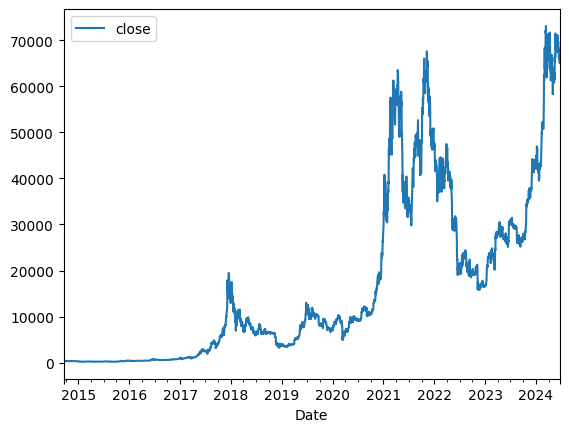

In [73]:
btc.columns = [c.lower() for c in btc.columns]
btc.plot.line(y="close", use_index=True)

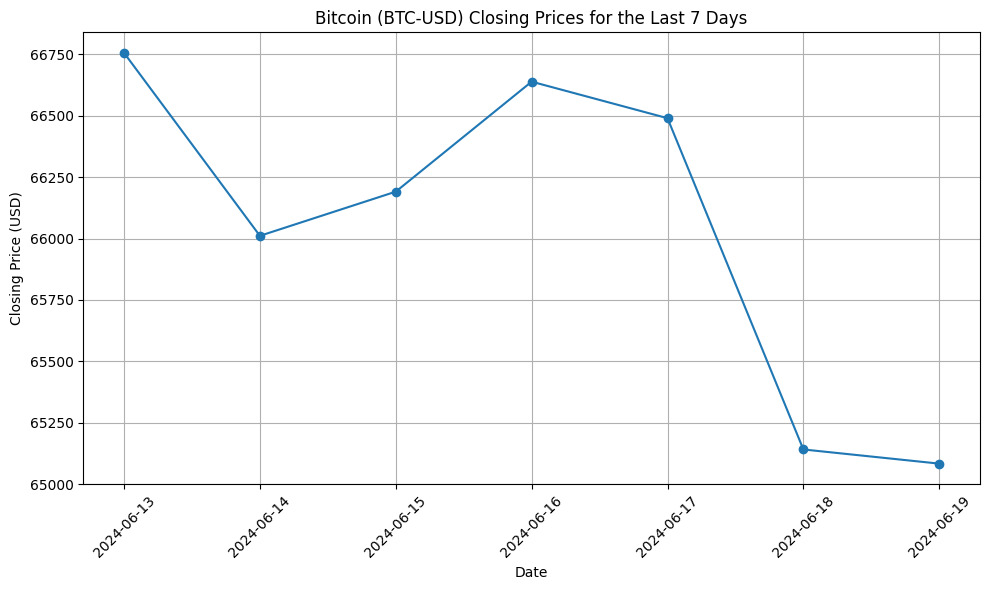

In [74]:
last_seven_days_btc = btc[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_btc.index, last_seven_days_btc['close'], marker='o')
plt.title('Bitcoin (BTC-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
wiki = pd.read_csv("bitcoin_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.533333,-0.055453,0.110185
2024-06-16,0.533333,-0.055453,0.110185
2024-06-17,0.566667,-0.024052,0.110185
2024-06-18,0.566667,-0.024052,0.110185


In [76]:
# Assuming 'btc' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
btc = btc.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)
btc["target"].value_counts()


target
1    1886
0    1678
Name: count, dtype: int64

In [77]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,0.533333,-0.055453,0.110185,66639.046875,1
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,0.533333,-0.055453,0.110185,66490.296875,0
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,0.566667,-0.024052,0.110185,65140.746094,0
2024-06-18 00:00:00+00:00,66490.976562,66556.703125,64066.957031,65140.746094,39481285950,0.566667,-0.024052,0.110185,65083.039062,0


In [78]:
btc.to_csv('btcSentiment.csv')

In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [80]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5666666666666667

In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [82]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [83]:
preds

2023-12-03 00:00:00+00:00    1
2023-12-04 00:00:00+00:00    1
2023-12-05 00:00:00+00:00    1
2023-12-06 00:00:00+00:00    1
2023-12-07 00:00:00+00:00    1
                            ..
2024-06-15 00:00:00+00:00    0
2024-06-16 00:00:00+00:00    0
2024-06-17 00:00:00+00:00    0
2024-06-18 00:00:00+00:00    0
2024-06-19 00:00:00+00:00    0
Length: 200, dtype: int32

In [84]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [85]:
predictions["predictions"].value_counts()

predictions
1    1408
0    1061
Name: count, dtype: int64

In [86]:
precision_score(predictions["target"], predictions["predictions"])

0.5049715909090909

In [87]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [88]:
btc, new_predictors = compute_rolling(btc.copy())
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,0.533333,-0.055453,0.110185,66639.046875,1,...,0.5,0.978140,0.571429,0.428571,1.006047,0.566667,0.483333,1.487692,1.989589,0.515068
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,0.533333,-0.055453,0.110185,66490.296875,0,...,1.0,0.991056,0.561905,0.428571,1.011483,0.572222,0.500000,1.494070,1.990137,0.515068
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,0.566667,-0.024052,0.110185,65140.746094,0,...,0.5,0.995234,0.557143,0.428571,1.008465,0.578333,0.483333,1.487067,1.990776,0.515068
2024-06-18 00:00:00+00:00,66490.976562,66556.703125,64066.957031,65140.746094,39481285950,0.566667,-0.024052,0.110185,65083.039062,0,...,0.0,0.979624,0.552381,0.428571,0.987672,0.584444,0.466667,1.453474,1.991416,0.512329


In [89]:
predictions = backtest(btc, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5247181266261925

In [90]:
predictions

,target,predictions
2017-09-16 00:00:00+00:00,0,0
2017-09-17 00:00:00+00:00,1,1
2017-09-18 00:00:00+00:00,0,0
2017-09-19 00:00:00+00:00,0,1
2017-09-20 00:00:00+00:00,0,1
...,...,...
2024-06-15 00:00:00+00:00,1,1
2024-06-16 00:00:00+00:00,0,0
2024-06-17 00:00:00+00:00,0,1
2024-06-18 00:00:00+00:00,0,1


In [91]:
prob_inc = (predictions["predictions"] == 1).mean()
prob_dec = 1 - prob_inc
print(f"Probability of increase: {prob_inc:.4f}")
print(f"Probability of decrease: {prob_dec:.4f}")

Probability of increase: 0.4670
Probability of decrease: 0.5330


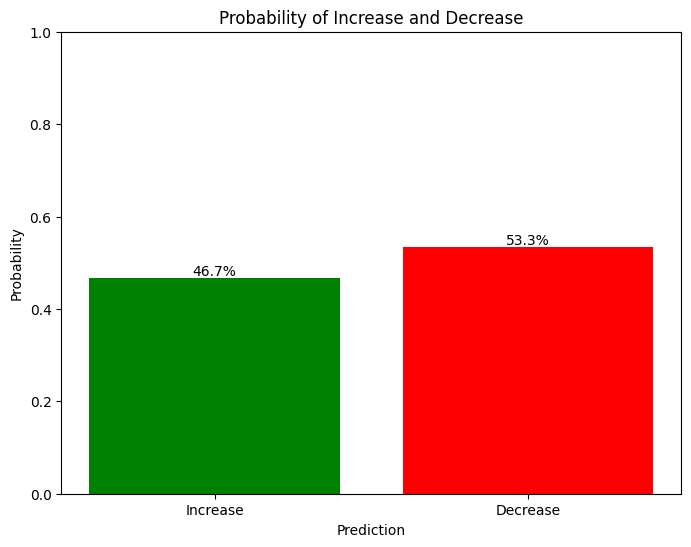

In [92]:
import matplotlib.pyplot as plt

prob_inc_pct = prob_inc * 100
prob_dec_pct = prob_dec * 100

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(["Increase", "Decrease"], [prob_inc, prob_dec], color=['green', 'red'])
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title('Probability of Increase and Decrease')

# Display percentages on top of bars
for bar, pct in zip(bars, [prob_inc_pct, prob_dec_pct]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()